# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [29]:
import pandas as pd

df = pd.read_csv('advertising.csv')
display(df)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

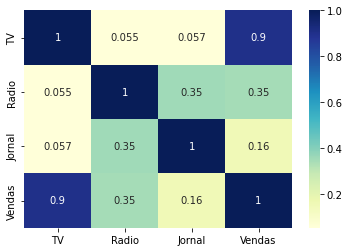

In [30]:
# TV, rádio e jornal = milhares de reais
# Vendas = milhões de reais

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [31]:
from sklearn.model_selection import train_test_split

x = df.drop('Vendas', axis=1)
y = df['Vendas']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

model_linear_regression = LinearRegression()
model_forest_regressor = RandomForestRegressor()

model_linear_regression.fit(x_train, y_train)
model_forest_regressor.fit(x_train, y_train)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [33]:
from sklearn import metrics

predict_linear_regression = model_linear_regression.predict(x_test)
predict_forest_regressor = model_forest_regressor.predict(x_test)

print('Score linear regression:', metrics.r2_score(y_test, predict_linear_regression))
print('Score forest regressor:', metrics.r2_score(y_test, predict_forest_regressor))

Score linear regression: 0.911687502238236
Score forest regressor: 0.9668712314236119


#### Visualização Gráfica das Previsões

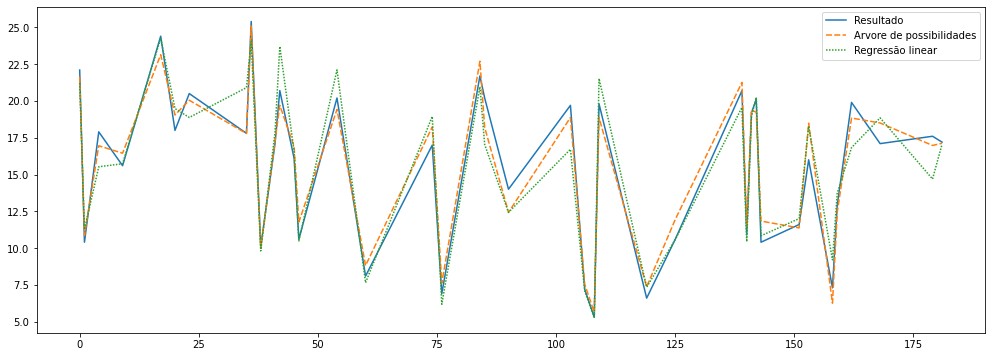

In [34]:
df_auxi = pd.DataFrame()
df_auxi['Resultado'] = y_test
df_auxi['Arvore de possibilidades'] = predict_forest_regressor
df_auxi['Regressão linear'] = predict_linear_regression

plt.figure(figsize=[17,6])
sns.lineplot(data=df_auxi)
plt.show()

#### Como fazer uma nova previsão?

In [35]:
df_new = pd.read_csv('novos.csv')

display(df_new)
predict_new = model_forest_regressor.predict(df_new)
print(predict_new)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


[ 7.606  8.733 20.569]


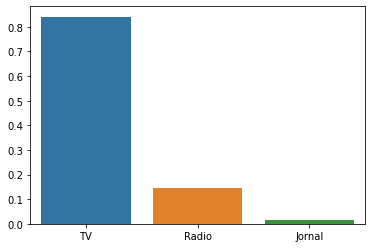

In [40]:
sns.barplot(x=x_train.columns, y=model_forest_regressor.feature_importances_)
plt.show()